<a href="https://colab.research.google.com/github/andrewcchan/gt-xai/blob/dev/GT_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)



In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Basic DT

In [4]:
clf_0 = tree.DecisionTreeClassifier()
clf_0 = clf_0.fit(X_train, y_train)
clf_0.score(X_test,y_test)

1.0

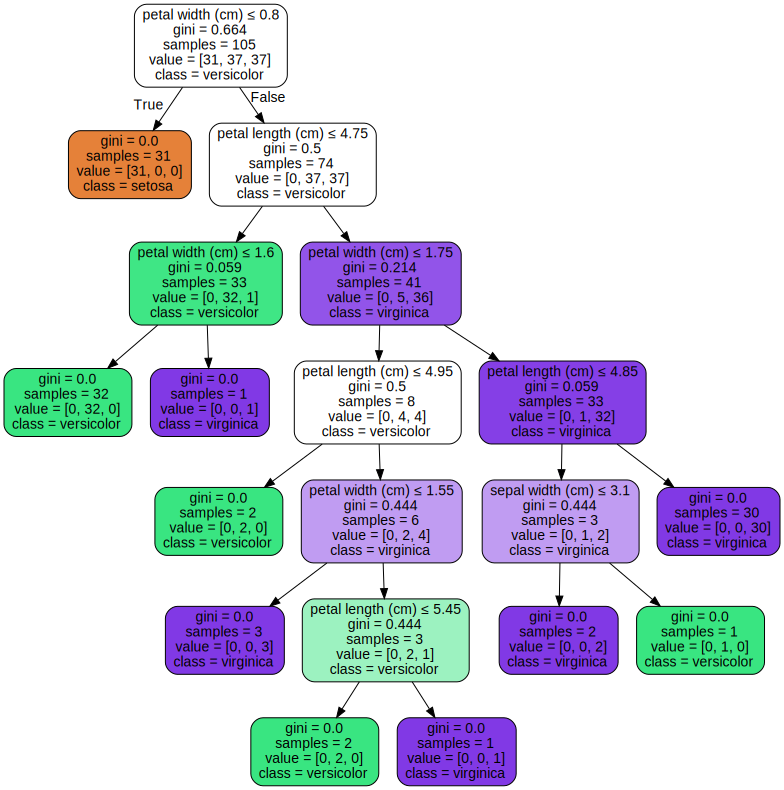

In [5]:
dot_data = tree.export_graphviz(clf_0, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Global Models


In [6]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_features=4)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

png_bytes = graph.pipe(format='png')
with open('dtree_4_pipe.png','wb') as f:
    f.write(png_bytes)

In [7]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_features=2)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)


dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

png_bytes = graph.pipe(format='png')
with open('dtree_2_pipe.png','wb') as f:
    f.write(png_bytes)

# Instrinsic Model


In [8]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)


0.9777777777777777

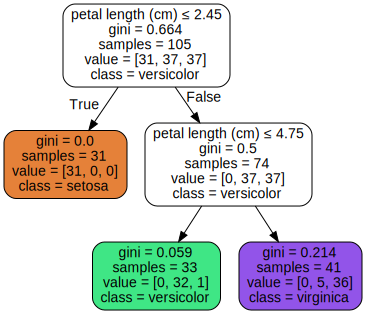

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Post-hoc model

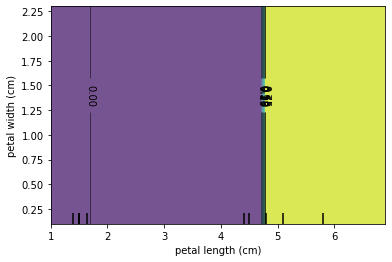

In [10]:
from sklearn.inspection import PartialDependenceDisplay
disp1 = PartialDependenceDisplay.from_estimator(clf, X_test,
                                                [(2,3)],feature_names=iris.feature_names,target=2)

# local model
https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html

In [11]:

!pip install lime

In [12]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [13]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_test, feature_names=iris.feature_names, class_names=iris.target_names, discretize_continuous=True)

In [14]:
i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test[i], clf.predict_proba, num_features=4, top_labels=1)

In [15]:
exp = explainer.explain_instance(X_test[0], clf.predict_proba, num_features=4, top_labels=1)
as_list = exp.as_list(exp.available_labels()[0])
as_list[0][1]

0.5122868002740801

In [16]:
for i in range(X_test.shape[0]):
  exp = explainer.explain_instance(X_test[i], clf.predict_proba, num_features=4, top_labels=1)
  as_list = exp.as_list(exp.available_labels()[0])
  print(as_list)

[('4.40 < petal length (cm) <= 5.00', 0.4916841863659857), ('5.80 < sepal length (cm) <= 6.40', -0.01750649950154084), ('0.20 < petal width (cm) <= 1.30', -0.01605383905299947), ('sepal width (cm) <= 2.80', -0.010045720041719195)]
[('0.20 < petal width (cm) <= 1.30', 0.022931801197095023), ('1.50 < petal length (cm) <= 4.40', -0.021452145779416038), ('5.20 < sepal length (cm) <= 5.80', 0.01588840913926807), ('sepal width (cm) > 3.40', -0.010110753860488257)]
[('petal length (cm) > 5.00', 0.7780875028265408), ('sepal width (cm) <= 2.80', -0.009688357582494048), ('petal width (cm) > 1.80', 0.008453667896171819), ('sepal length (cm) > 6.40', -0.002681888756763252)]
[('4.40 < petal length (cm) <= 5.00', 0.4898614650231852), ('5.80 < sepal length (cm) <= 6.40', -0.011587896437333607), ('1.30 < petal width (cm) <= 1.80', 0.011324104456808955), ('2.80 < sepal width (cm) <= 3.10', 0.006225422705366772)]
[('4.40 < petal length (cm) <= 5.00', 0.018282723594885458), ('1.30 < petal width (cm) <= 1

# Basic Stats: Training Data


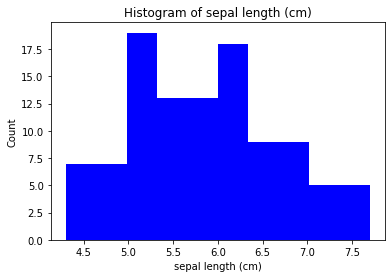

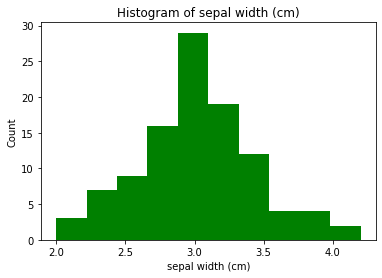

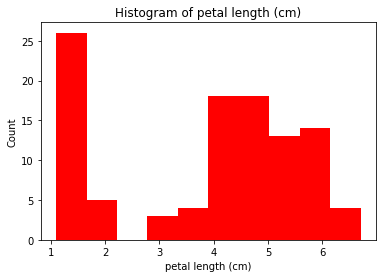

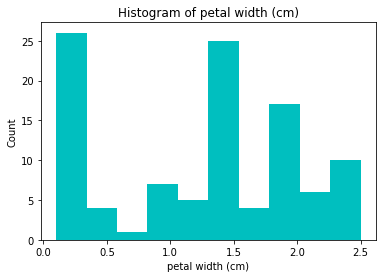

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
cycol = cycle('bgrcmk')

for i in range(X_train.shape[1]):
  plt.hist(X_train[:,i],color=next(cycol))
  plt.xlabel(iris.feature_names[i])
  plt.ylabel('Count')
  plt.title('Histogram of '+iris.feature_names[i])
  plt.show()

In [18]:
df = pd.DataFrame(data = y_train,columns=['Class'])
# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans
di = {0: iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2] }
df = df.replace({"Class": di})

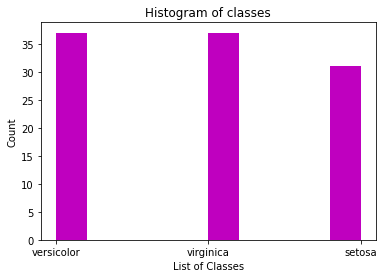

In [19]:
plt.hist(df['Class'],color=next(cycol))
plt.xlabel('List of Classes')
plt.ylabel('Count')
plt.title('Histogram of classes')
plt.show()

In [20]:
y_train.shape

(105,)

# Basic Stats Testing

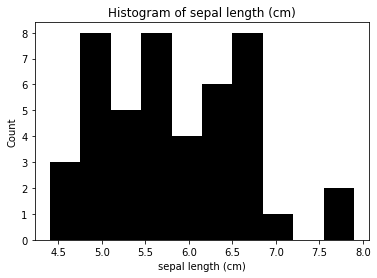

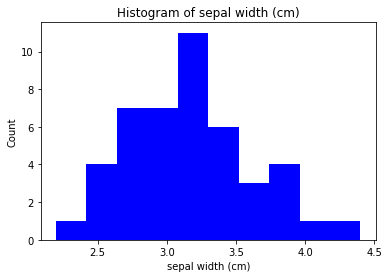

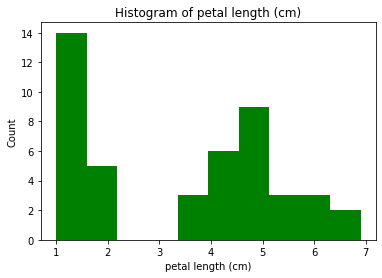

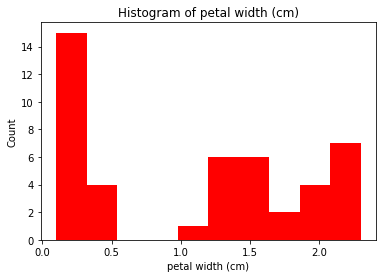

In [21]:
for i in range(X_test.shape[1]):
  plt.hist(X_test[:,i],color=next(cycol))
  plt.xlabel(iris.feature_names[i])
  plt.ylabel('Count')
  plt.title('Histogram of '+iris.feature_names[i])
  plt.show()

In [22]:
df = pd.DataFrame(data = y_test,columns=['Class'])
# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans
di = {0: iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2] }
df = df.replace({"Class": di})

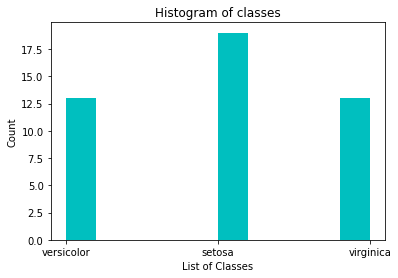

In [23]:
plt.hist(df['Class'],color=next(cycol))
plt.xlabel('List of Classes')
plt.ylabel('Count')
plt.title('Histogram of classes')
plt.show()

In [24]:
y_test.shape

(45,)

# My own weird GT method

In [25]:
!pip install nashpy
import nashpy as nash

Make matrix per sample

In [26]:
# from re import M
def createMatrix(clf, xTest):
  # returns 2 x 2 np array 
  probs = clf.predict_proba(xTest.reshape(1,-1))
  # ['setosa', 'versicolor', 'virginica'] is the probs output
  m00 = probs[0]
  matrix = np.array([np.array([probs[0][0],probs[0][0]]),probs[0][1:]])

  return matrix

Get equilibrium positions from GT

In [27]:
def getNashEqFeatures(A):
  rps = nash.Game(A,A.T)
  # eqs = rps.lemke_howson(initial_dropped_label=0)
  eqs = rps.support_enumeration()
  print('EQS',eqs)
  a = []
  for i in eqs:
    a.append(i)
  indices = np.array(a[0])
  return indices

#debug

In [28]:
A = createMatrix(clf, X_test[0])
gt = nash.Game(A,A.T)
gt

Bi matrix game with payoff matrices:

Row player:
[[0.         0.        ]
 [0.96969697 0.03030303]]

Column player:
[[0.         0.96969697]
 [0.         0.03030303]]

From equlibria, compare actual features with 
1. classification from GT + DT
2. features from GT + DT

In [29]:

def compareActualFeatures(x_test, gt_class, gt_petal_length, gt_petal_width,class_counter,petal_length_counter,petal_width_counter):
  actual_petal_length = X_test[0][2]
  actual_petal_width = X_test[0][3]
  actual_class = y_test[0]
  # class
  if actual_class == gt_class:
    class_counter += 1
  # petal length
  if (gt_petal_length) == 1 and (actual_petal_length>2.45):
    petal_length_counter+=1
  elif (gt_petal_length) == 0.5:
    # if 0.5 from gt, then give 0.5 point
    petal_length_counter+= 0.5
  elif (gt_petal_length) == 0 and (actual_petal_length<2.45):
    petal_length_counter+=1
  
  # petal width
  if (gt_petal_width) == 1 and (actual_petal_width>1.75):
    petal_width_counter+=1
  elif (gt_petal_width) == 0.5:
    # if 0.5 from gt, then give 0.5 point
    petal_width_counter+= 0.5
  elif (gt_petal_width) == 0 and (actual_petal_width<1.75):
    petal_width_counter+=1
  return class_counter,petal_length_counter,petal_width_counter

In [30]:
class_counter = 0
petal_length_counter = 0
petal_width_counter = 0

iCounter = 0
for i in tqdm(X_test):
  print(iCounter)
  iCounter += 1
  print(i)
  indices = getNashEqFeatures(createMatrix(clf, i))
  print('indices.shape',indices.shape)
  if not np.isnan(indices[0]).all() and not np.isnan(indices[1]).all(): 
    # ['setosa', 'versicolor', 'virginica'] is the probs output
    # find the class predicted from gt
    gt_class = 3
    if indices[0][0] == 1 \
      and indices[0][1] == 0 \
      and indices[1][0] == 1 \
      and indices[1][1] == 0:
      gt_class = 0
    elif indices[0][0] == 1 \
      and indices[0][1] == 0 \
      and indices[1][0] == 0 \
      and indices[1][1] == 1:
      gt_class = 0
    elif indices[0][0] == 0 \
      and indices[0][1] == 1 \
      and indices[1][0] == 1 \
      and indices[1][1] == 0:
      gt_class = 1
    elif indices[0][0] == 0 \
      and indices[0][1] == 1 \
      and indices[1][0] == 0 \
      and indices[1][1] == 1:
      gt_class = 2
    
    # get gt_petal_length, gt_petal_width

    gt_petal_length = indices[0][1]
    gt_petal_width = indices[1][1]

    class_counter,petal_length_counter,petal_width_counter = compareActualFeatures(i,gt_class,gt_petal_length,gt_petal_width,class_counter,petal_length_counter,petal_width_counter)

 40%|████      | 18/45 [00:00<00:00, 179.90it/s]

0
[6.1 2.8 4.7 1.2]
EQS <generator object support_enumeration at 0x7f7eeea8a050>
indices.shape (2, 2)
1
[5.7 3.8 1.7 0.3]
EQS <generator object support_enumeration at 0x7f7eeea8a050>
indices.shape (2, 2)
2
[7.7 2.6 6.9 2.3]
EQS <generator object support_enumeration at 0x7f7eeea8a050>
indices.shape (2, 2)
3
[6.  2.9 4.5 1.5]
EQS <generator object support_enumeration at 0x7f7eeea8a050>
indices.shape (2, 2)
4
[6.8 2.8 4.8 1.4]
EQS <generator object support_enumeration at 0x7f7eeea8a050>
indices.shape (2, 2)
5
[5.4 3.4 1.5 0.4]
EQS <generator object support_enumeration at 0x7f7eeea8a050>
indices.shape (2, 2)
6
[5.6 2.9 3.6 1.3]
EQS <generator object support_enumeration at 0x7f7eeea8a050>
indices.shape (2, 2)
7
[6.9 3.1 5.1 2.3]
EQS <generator object support_enumeration at 0x7f7eeea8a050>
indices.shape (2, 2)
8
[6.2 2.2 4.5 1.5]
EQS <generator object support_enumeration at 0x7f7eeea8a050>
indices.shape (2, 2)
9
[5.8 2.7 3.9 1.2]
EQS <generator object support_enumeration at 0x7f7eeea8a050>
i

100%|██████████| 45/45 [00:00<00:00, 157.31it/s]

indices.shape (2, 2)
33
[4.8 3.4 1.6 0.2]
EQS <generator object support_enumeration at 0x7f7eee751b50>
indices.shape (2, 2)
34
[4.4 3.2 1.3 0.2]
EQS <generator object support_enumeration at 0x7f7eee751950>
indices.shape (2, 2)
35
[6.3 2.5 5.  1.9]
EQS <generator object support_enumeration at 0x7f7eee751950>
indices.shape (2, 2)
36
[6.4 3.2 4.5 1.5]
EQS <generator object support_enumeration at 0x7f7eee751b50>
indices.shape (2, 2)
37
[5.2 3.5 1.5 0.2]
EQS <generator object support_enumeration at 0x7f7eee751b50>
indices.shape (2, 2)
38
[5.  3.6 1.4 0.2]
EQS <generator object support_enumeration at 0x7f7eee751b50>
indices.shape (2, 2)
39
[5.2 4.1 1.5 0.1]
EQS <generator object support_enumeration at 0x7f7eee751b50>
indices.shape (2, 2)
40
[5.8 2.7 5.1 1.9]
EQS <generator object support_enumeration at 0x7f7eee751b50>
indices.shape (2, 2)
41
[6.  3.4 4.5 1.6]
EQS <generator object support_enumeration at 0x7f7eee751b50>
indices.shape (2, 2)
42
[6.7 3.1 4.7 1.5]
EQS <generator object support_e

In [31]:
total_test_size = y_test.shape[0]
print('class_counter accuracy:',class_counter/total_test_size)
print('petal_length_counter accuracy:',petal_length_counter/total_test_size)
print('petal_width_counter accuracy:',petal_width_counter/total_test_size)

class_counter accuracy: 0.0
petal_length_counter accuracy: 0.5777777777777777
petal_width_counter accuracy: 0.4222222222222222


In [32]:
clf.predict_proba(X_test[0].reshape(1,-1))

array([[0.        , 0.96969697, 0.03030303]])